# Technocolabs Mini Project: BigMart Sales Dataset

## Introduction

### Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

### Hypothesis Generation

for a problem statement as understanding the sales of products in stores and working on increasing them, we first need to understand the properties of products and stores and what may increase the sales of such products

*Product Properties*
1. **Offers** : products with offers should have higher sales
2. **Price** : products with lower prices should have higher sales
3. **Healthiness** : products that are a healthy alternative should have higher sales
4. **Quality** : products of high quality for price should have higher sales
5. **Well-known brands** : products of reputable brands should have higher sales
6. **Freshness**: fresh products should have higher sales
7. **Usage** : daily used products should have higher sales
8. **Placement** : products that are placed at eye-level and visible should have higher sales

*Store Properties*
1. **Store Area**: stores of larger area allow for more customers and thus, more sales
2. **Store Location**: stores located in a populated area should have more sales
3. **Staff** : stores with higher number of staff for assistance and marketing should have more sales

## Data Structure and Content

### Columns Identification
* **Item_Identifier**: product ID
* **Item_Weight** : weight of product
* **Item_Fat_Content** : Whether the product is low fat or not
* **item_Visibility** : The % of the total display area of all products in a store allocated to the particular product
* **Item_Type** : The category to which the product belongs
* **Item_MRP** : Maximum Retail Price (list price) of the product
* **Outlet_Identifier** : Store ID
* **Outlet_Establishment_Year** : The year in which the store was established
* **Outlet_Size** : The size of the store in terms of ground area covered
* **Outlet_Location_Type** : The type of city in which the store is located
* **Outlet_Type** :  Whether the outlet is just a grocery store or some sort of supermarket
* **Item_Outlet_Sales** : Sales of the product in a particular store.

* The dataset contains 8523 observations with 12 features classified as 7 categorical features and 5 numerical features
* Our target variable is **Item_Outlet_Sales** and it is a continuous one so it is a **Regression Supervised Machine Learning Problem**

## Loading Packages and Data

In [115]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.preprocessing import PolynomialFeatures

import pickle

In [116]:
train = pd.read_csv('BigMartSales\Train.csv')
test = pd.read_csv('BigMartSales\Test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
print(f"Training Data shape: {train.shape}")

Training Data shape: (8523, 12)


In [118]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [119]:
print(f"Training Data shape: {test.shape}")

Training Data shape: (5681, 11)


## Data Preprocessing

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [121]:
#statistical summary
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [123]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Missing Value Treatment

Our data contains some null values which can't be given to a machine learning model. We will deal with these missing values differently if it is in a numerical or categorical column.

In [124]:
#putting the missing values in descending order to know how much data is missing in each column.
print("Train:\n")
train.isnull().sum().sort_values(ascending=False)

Train:



Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

to show how many % of the column values is missing

In [125]:
print("Train:\n",train.isnull().sum()/train.shape[0]*100)

Train:
 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [126]:
print("Test:\n")
test.isnull().sum().sort_values(ascending=False)

Test:



Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [127]:
print("Test:\n", test.isnull().sum()/test.shape[0]*100)

Test:
 Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


we can observe that both train and test have the same % of missing values in the same 2 columns

Mode Imputation for the **Outlet_Size** Column since it is a categorical column

In [128]:
print("Train mode: ",train['Outlet_Size'].mode().values[0])
print("Test mode: ",test['Outlet_Size'].mode().values[0])

Train mode:  Medium
Test mode:  Medium


both train and test have the same mode for this column

In [129]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(
  train['Outlet_Size'].mode().values[0])

test['Outlet_Size'] = test['Outlet_Size'].fillna(
  test['Outlet_Size'].mode().values[0])

In [130]:
#checking if the missing values are filled or not
print(train['Outlet_Size'].isnull().sum())
print(test['Outlet_Size'].isnull().sum())

0
0


In [131]:
# df['Outlet_Size'] = df.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(pd.Series.mode(self=x)[0]))

for *Item_Weight*: a numeric column so we need to visualize the distribution to check for outliers

Text(0.5, 1.0, 'Item_Weight')

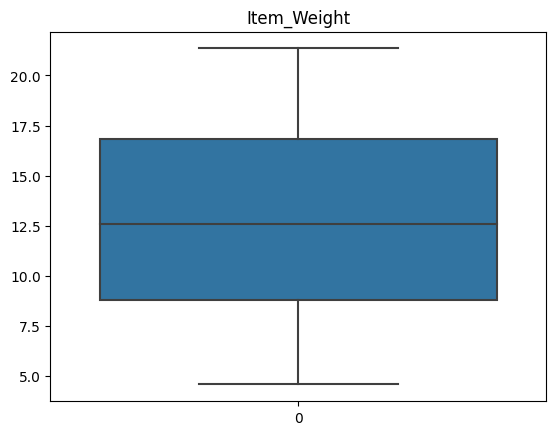

In [132]:
sns.boxplot(data=train['Item_Weight'])
plt.title("Item_Weight")

no outliers so we will perform Mean Imputation

In [133]:
# df['Item_Weight'] = df.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(pd.Series.mean(self=x)))

In [134]:
train['Item_Weight'] = train['Item_Weight'].fillna(
  train['Item_Weight'].mean()
)

test['Item_Weight'] = test['Item_Weight'].fillna(
  train['Item_Weight'].mean()
)

In [135]:
#checking if the missing values are filled or not
print(train['Item_Weight'].isnull().sum())
print(test['Item_Weight'].isnull().sum())

0
0


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


we have successfully filled our null values

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Numerical Attributes

In [138]:
num = train.select_dtypes('number').columns.to_list
print(num)

<bound method IndexOpsMixin.tolist of Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')>


In [139]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


as shown above, we can conclude that:
* For the product prices: the minimum price for a product is 31.29 and maximum is 266.888 and the mean is 141
* For the stores: the oldest store was established in 1985 and newest one in 2009. 
* The average outlet sales is about 2181.28 with minimum of 33.29 and maximum of 13086.96 

* it is better if we replaced **Outlet_Establishment_Year** with **Outlet_Age**

In [140]:
new_col = 2023 - train['Outlet_Establishment_Year']
train.insert(loc = 7, column = 'Outlet_Age', value = new_col)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,24,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,14,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,24,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,25,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,36,1987,High,Tier 3,Supermarket Type1,994.7052


In [141]:
new_col = 2023 - test['Outlet_Establishment_Year']
test.insert(loc = 7, column = 'Outlet_Age', value = new_col)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,24,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,16,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,25,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,16,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,38,1985,Medium,Tier 3,Supermarket Type3


#### Categorical Attributes

In [142]:
cat = train.select_dtypes('object').columns.to_list()

In [143]:
for feat in cat[1:]:
  print(f'\nFrequency of Category {feat} :')
  print('\n'," "*2, 'Number of Categories: ', len(train[feat].value_counts()), '\n')
  print(train[feat].value_counts())


Frequency of Category Item_Fat_Content :

    Number of Categories:  5 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Category Item_Type :

    Number of Categories:  16 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Category Outlet_Identifier :

    Number of Categories:  10 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Id

* there are some repeated values in **Item_Fat_Content** , we should replace them for more accurate analysis

In [144]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],
                                                        ['Low Fat', 'Low Fat', 'Regular'])
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],
                                                        ['Low Fat', 'Low Fat', 'Regular'])

train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Data Visualization

#### Univariate

Numerical Columns:

In [146]:
def boxplot_num(df, num_feat):
  fig = plt.figure(figsize=(12, 10))
  for i, feat in enumerate(num_feat):
    ax = plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[feat])

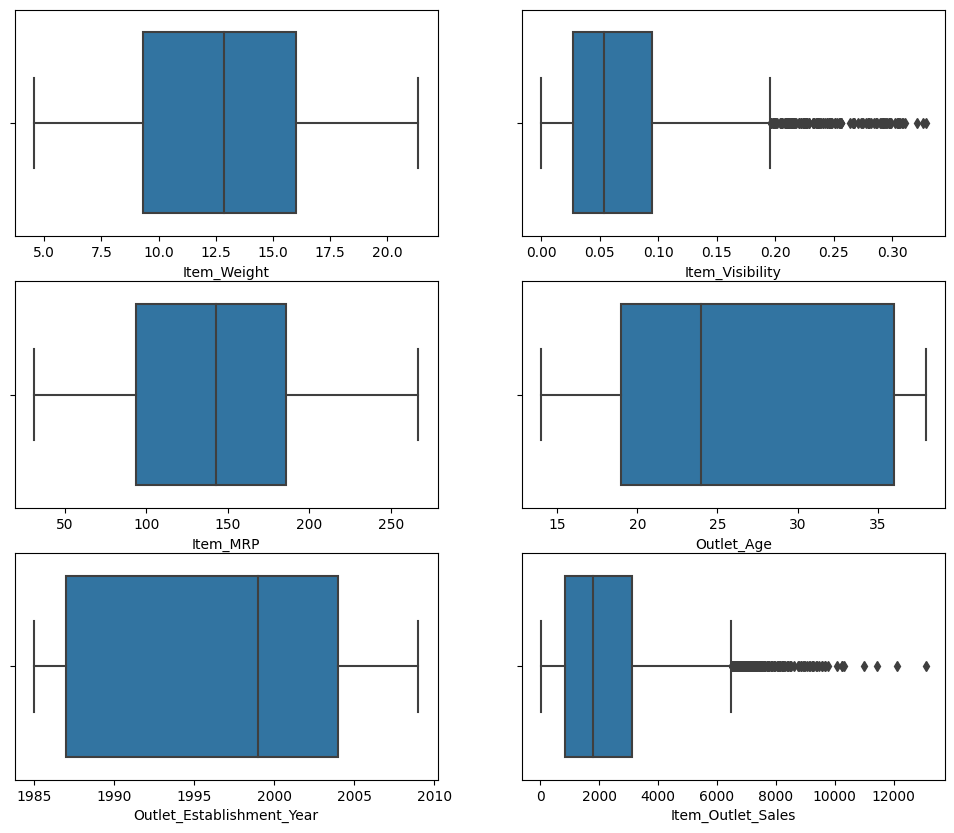

In [147]:
num = train.select_dtypes('number').columns.to_list()
num_df = train[num]
boxplot_num(train, num_df)

There are some outliers in **Item_Visibility** and **Item_Outlet_Sales** that we will deal with later on in feature engineering

In [148]:
def histplot_num(df, num_feat):
  fig = plt.figure(figsize=(14, 12))
  for i, feat in enumerate(num_feat):
    ax = plt.subplot(3, 2, i+1)
    plt.title(feat)
    plt.hist(x=df[feat])

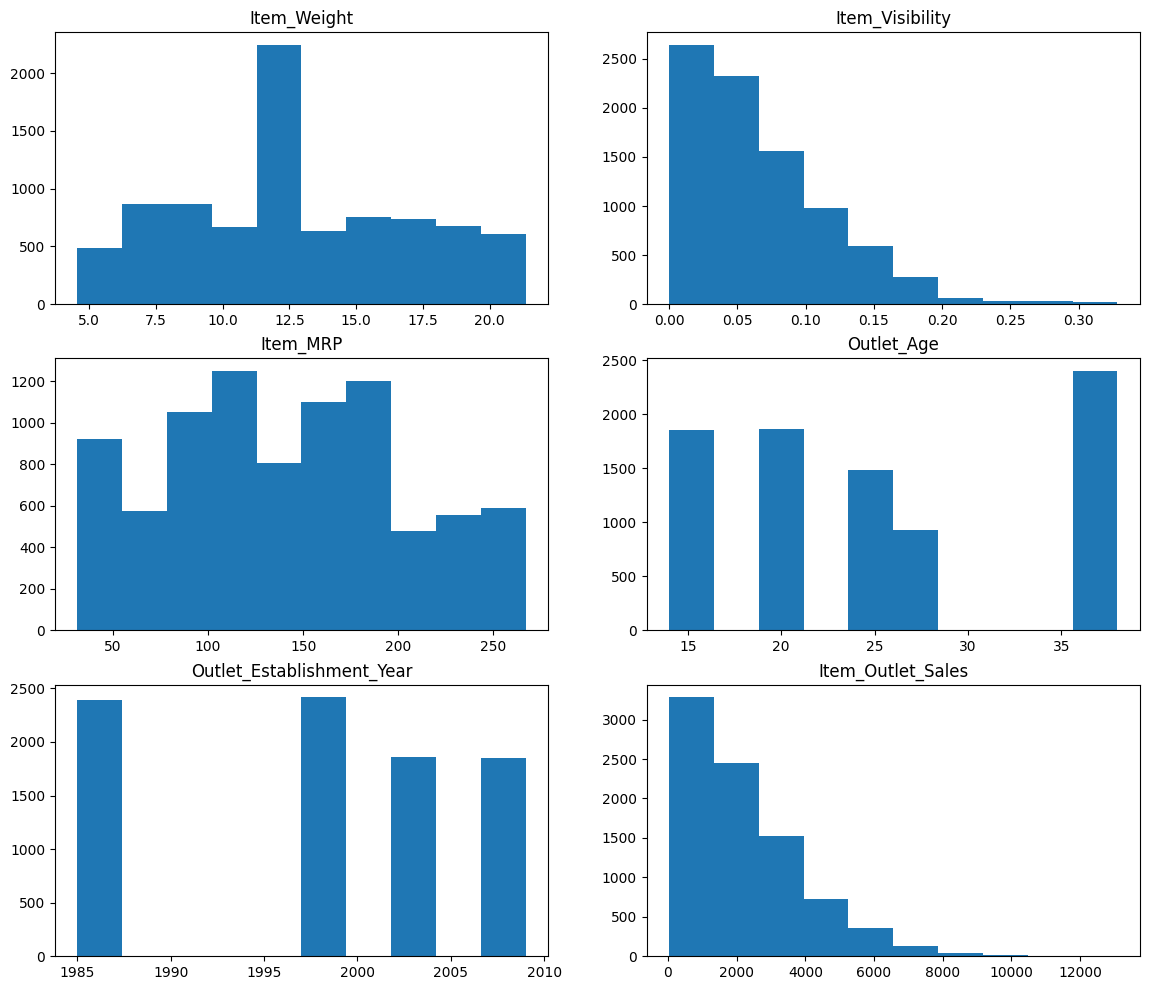

In [149]:
histplot_num(train, num_df)

In [150]:
def densplot_num(df, num_feat):
  fig = plt.figure(figsize=(15, 14))
  for i, feat in enumerate(num_feat):
    ax = plt.subplot(3, 2, i+1)
    sns.kdeplot(df[feat], fill=True)

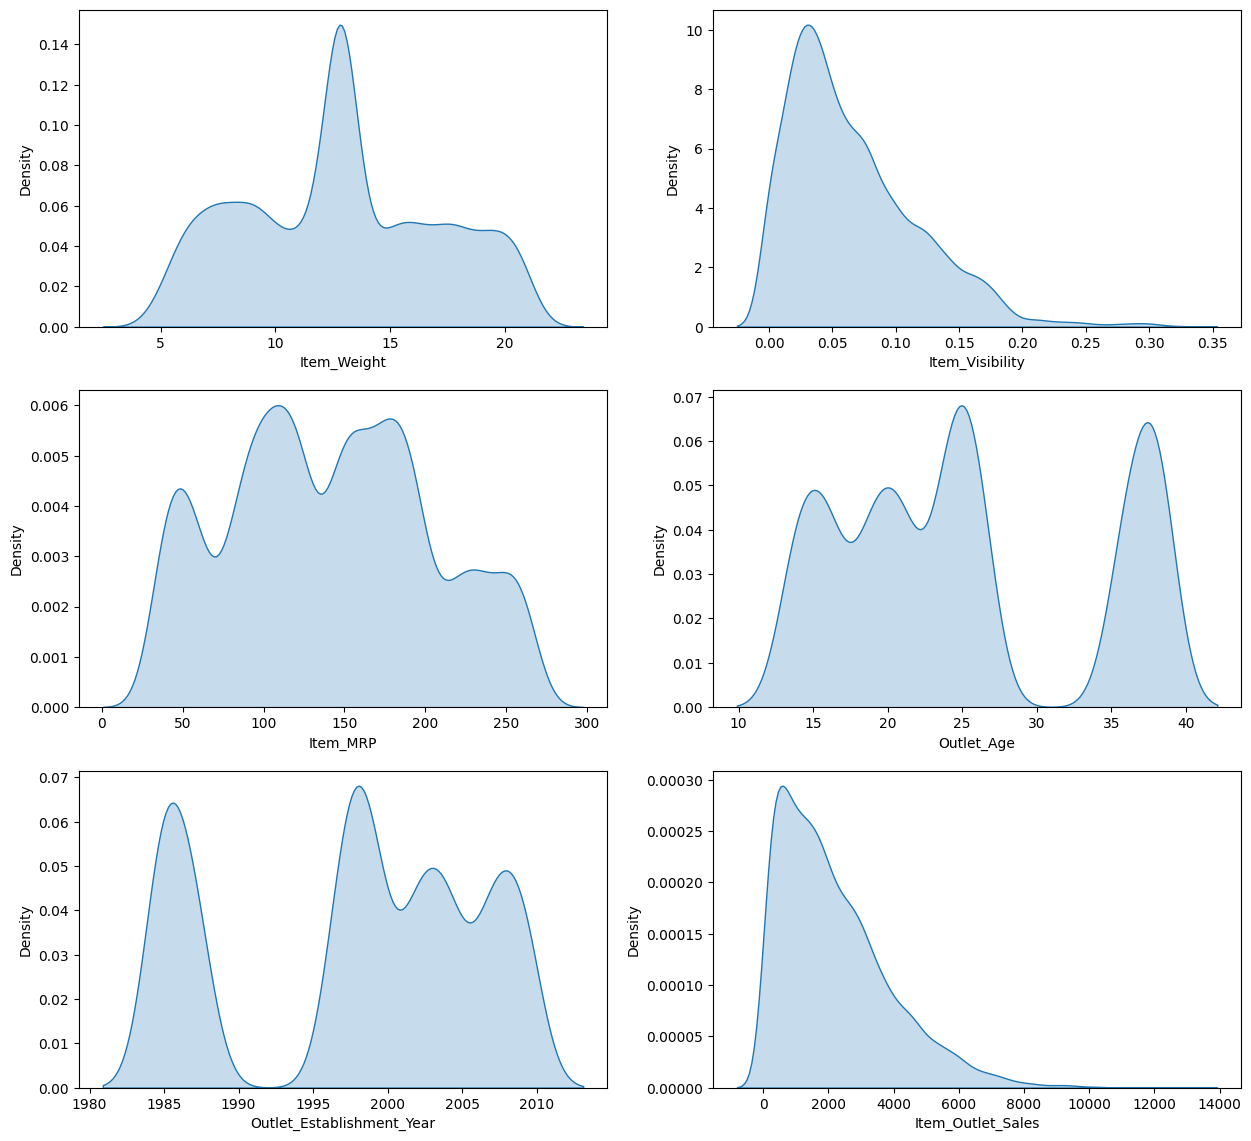

In [151]:
densplot_num(train, num_df)

we realize that:
* for **Outlet_Age**: most stores 38 years old
* **Item_Visibility** and **Item_Outlet_Sales** both have right-skewed distributions

Categorical:

In [154]:
def cat_plot(df, features):
  for i, feat in enumerate(features, 1):
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=feat, palette="winter")
    plt.xticks(rotation=45)

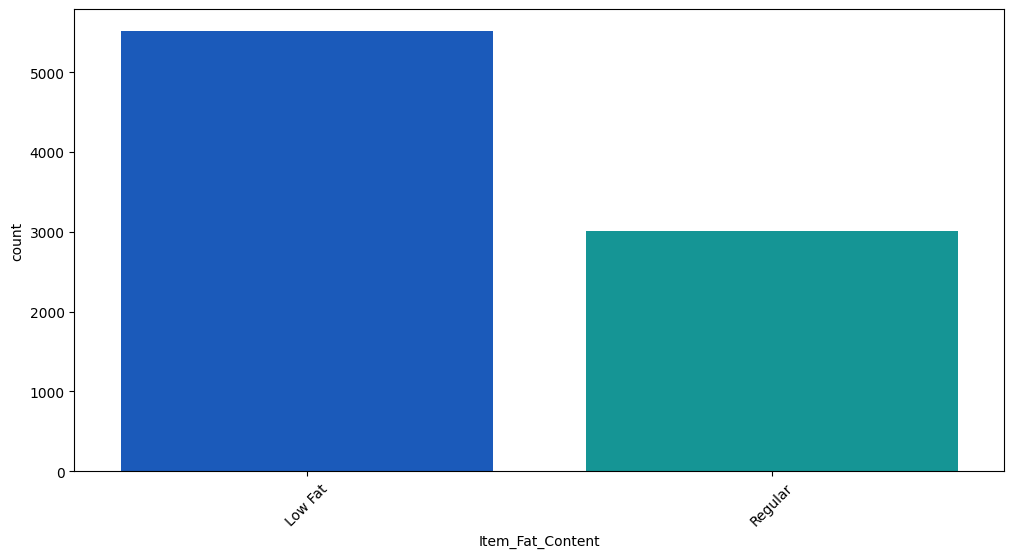

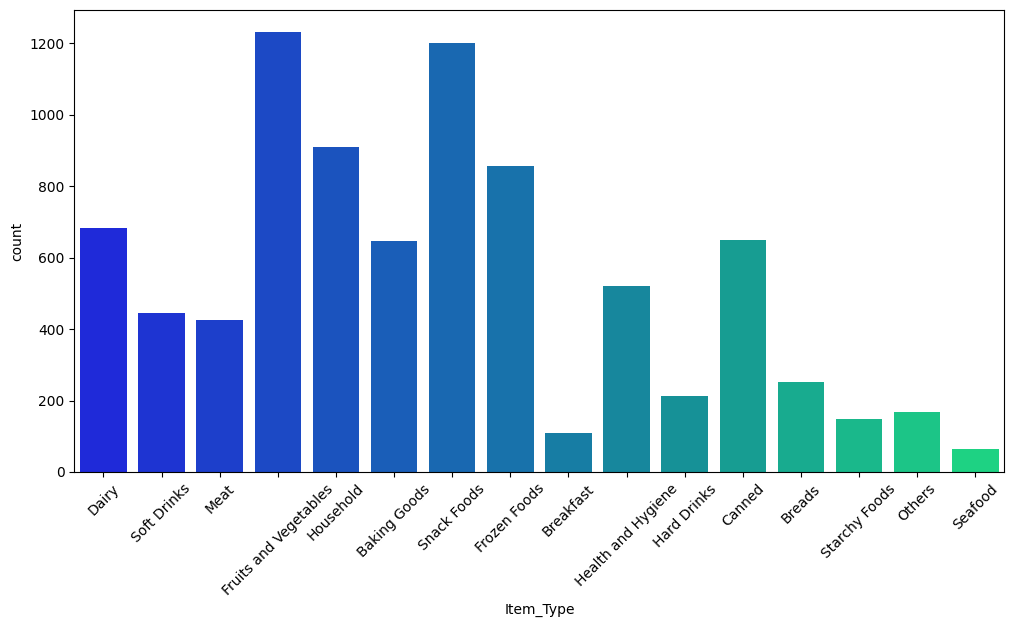

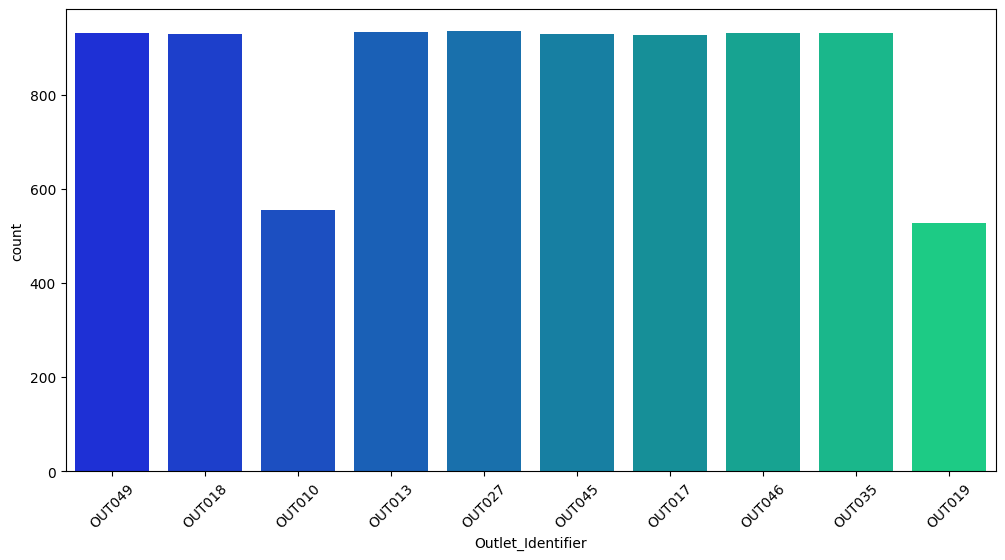

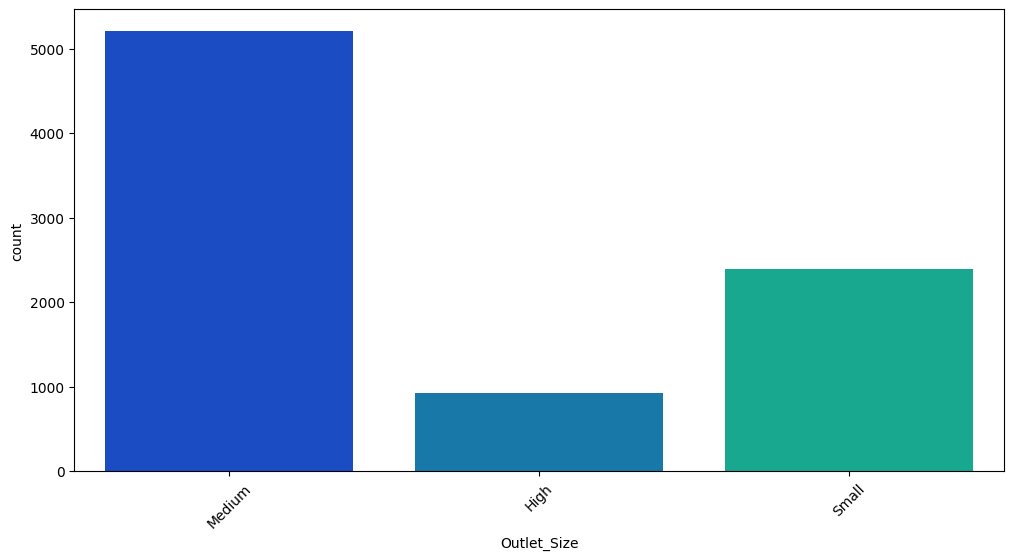

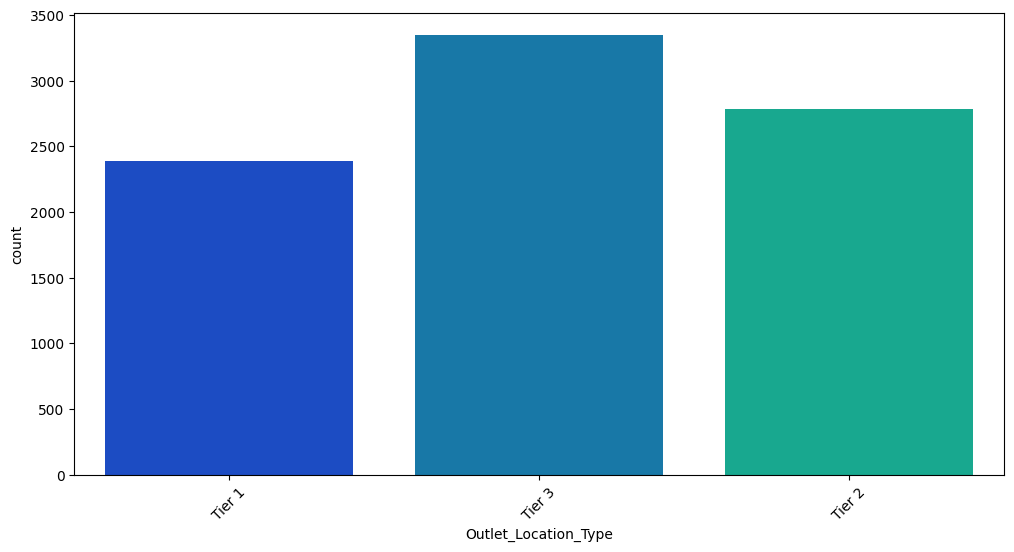

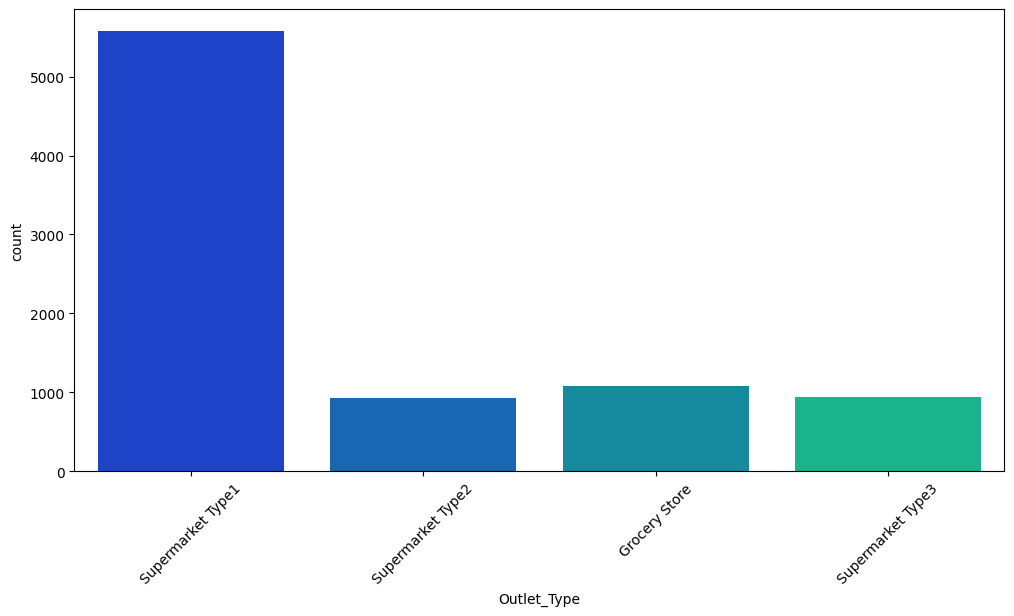

In [155]:
cat_df = train[cat[1:]]
cat_plot(train, cat_df)

* for **Item_Fat_Content**: most products are *low fat*
* for **Item_Type**: most popular products are *fruits & vegetables* and then *snacks*
* for **Outlet_Identifier**: products are fairly distributed among them except for *OUT010* and *OUT019* which have significantly less products
* for **Outlet_Size**: most products are in the *medium-sized* outlets
* for **Outlet_Location_Type**: most popular location type is *Tier 3*
* for **Outlet_Type**: *Supermarket Type1* has drastically larger products

#### Bivariate Analysis

##### Continuous - Continuous

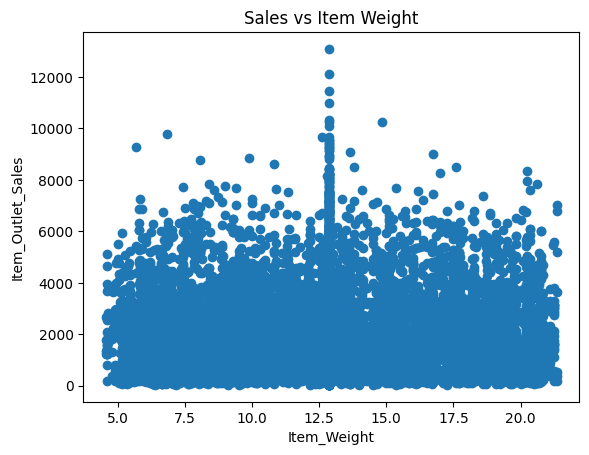

In [156]:
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])
plt.title('Sales vs Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

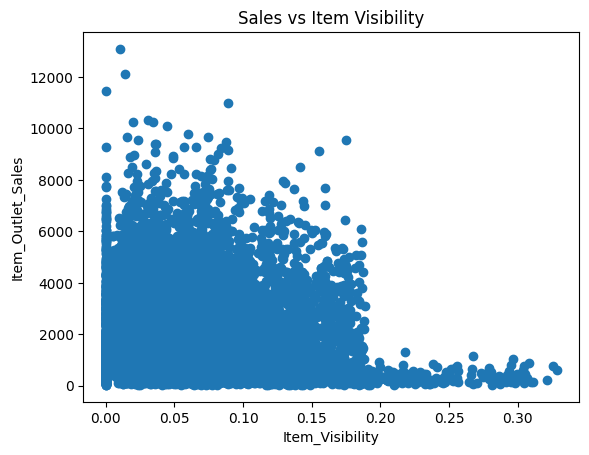

In [157]:
plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'])
plt.title('Sales vs Item Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

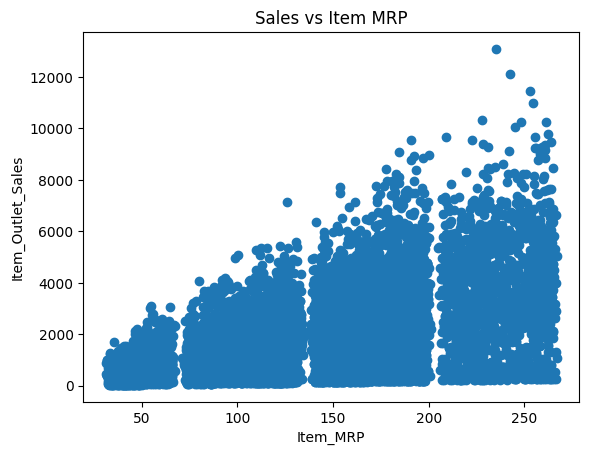

In [158]:
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'])
plt.title('Sales vs Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

* **Item-Weight** : there is no clear relationship, the data is randomly spreaded
* **Item_Visibility** : the graph is spreaded but it appears that there's a negative correlation
* **Item_MRP** : there appears that pricy products have higher sales

##### Correlation Matrix to indicate strength of relationship between continuous variables

In [159]:
matrix = train.corr(numeric_only=True)
matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.008301,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,0.074834,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,-0.005020,0.005020,0.567574
Outlet_Age,0.008301,0.074834,-0.005020,1.000000,-1.000000,0.049135
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,-1.000000,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,0.049135,-0.049135,1.000000


Visualization through heatmap

<AxesSubplot: >

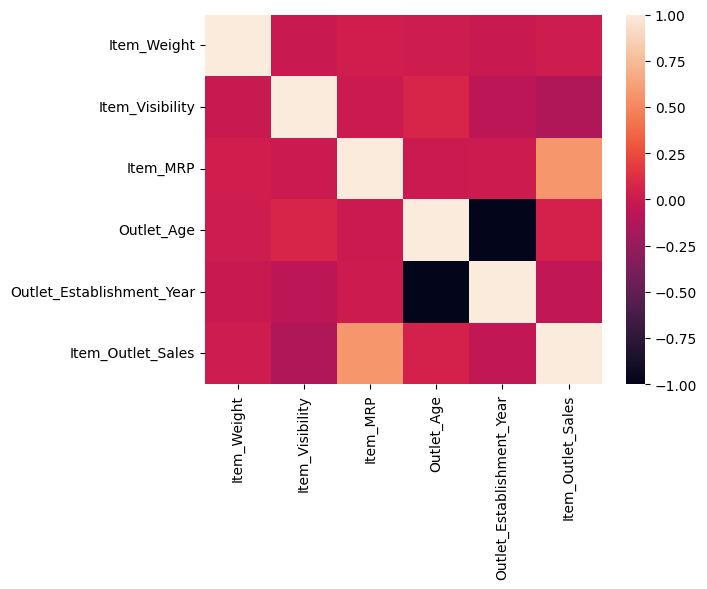

In [160]:
sns.heatmap(matrix)

as the correlation matrix shows, the Sales and Item_MRP are moderately positive correlated, while for the Item_Visibility they are low and negatively correlated. For the other attributes, there's no significant relationship between attributes or between attributes and target variable

##### Categorical - Continuous

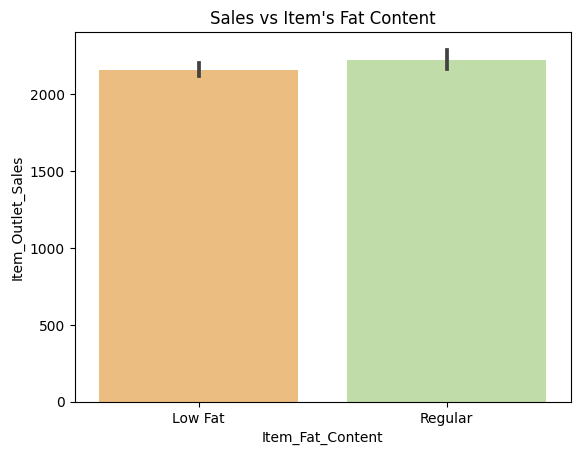

In [161]:
sns.barplot(data=train, x='Item_Fat_Content', y='Item_Outlet_Sales', palette='Spectral')
plt.title("Sales vs Item's Fat Content")
plt.show()

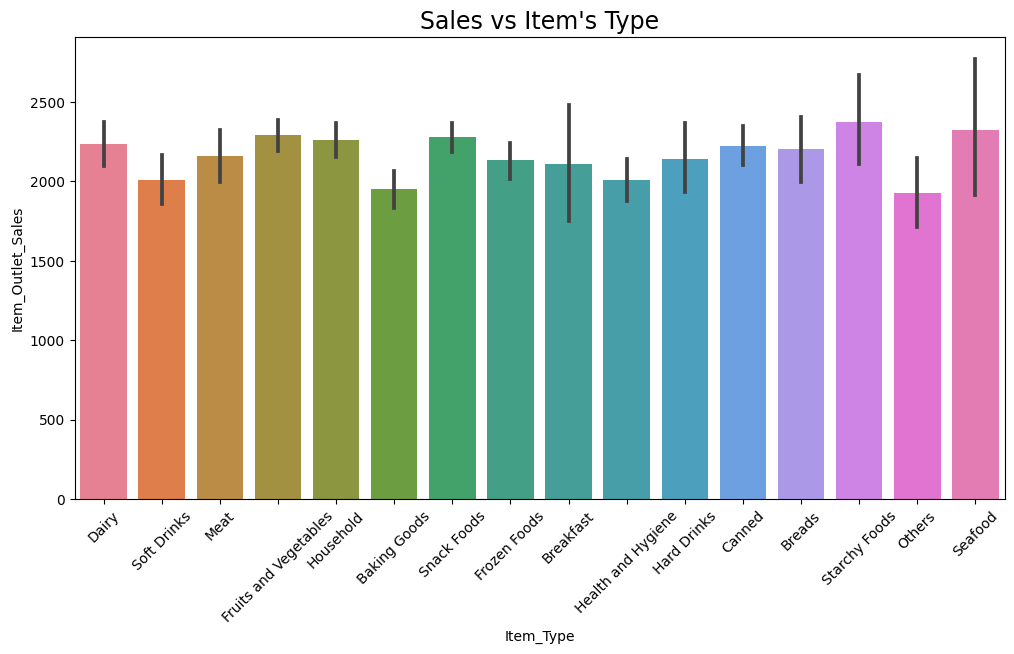

In [162]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x='Item_Type', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Item's Type", fontsize=17)
plt.xticks(rotation=45)
plt.show()

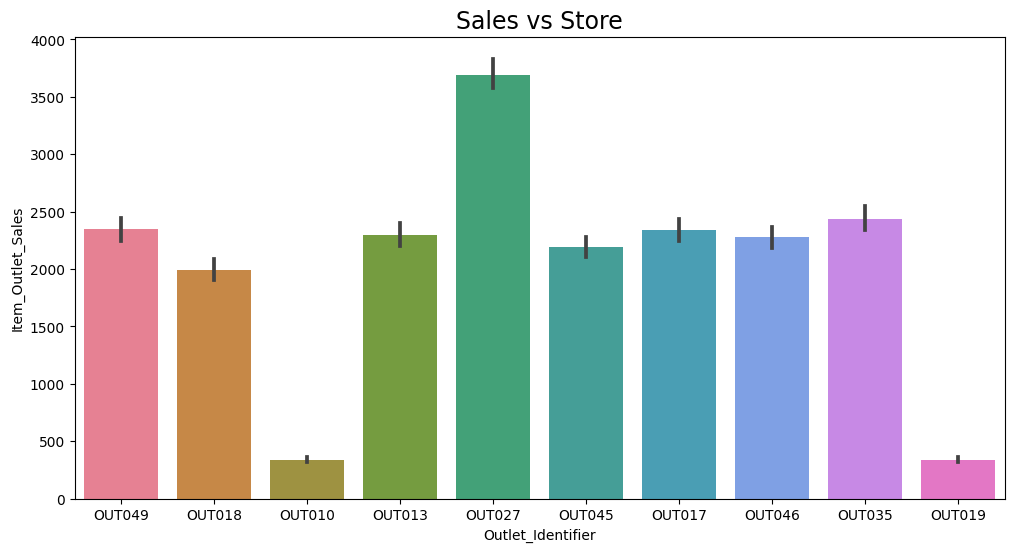

In [163]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x='Outlet_Identifier', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store", fontsize=17)
plt.show()

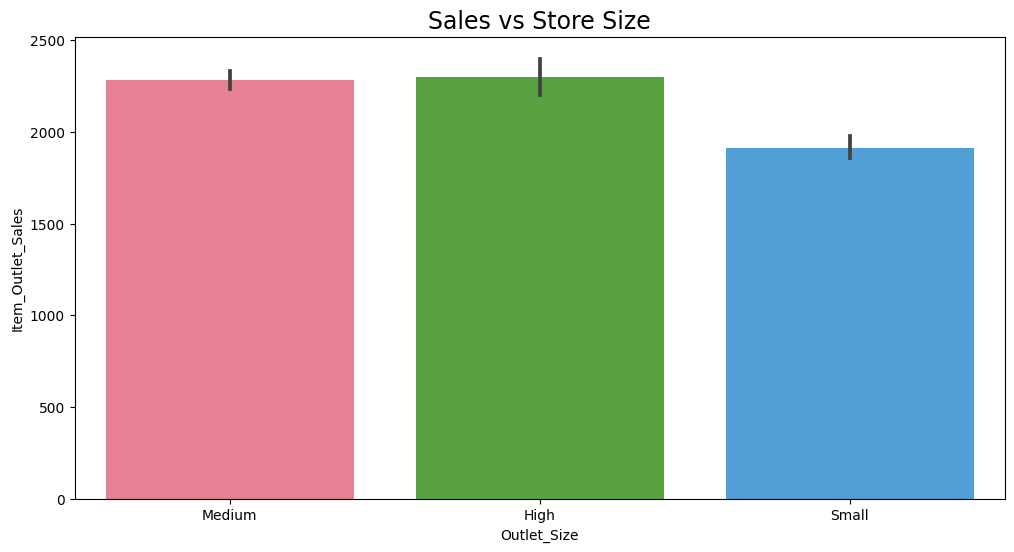

In [164]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store Size", fontsize=17)
plt.show()

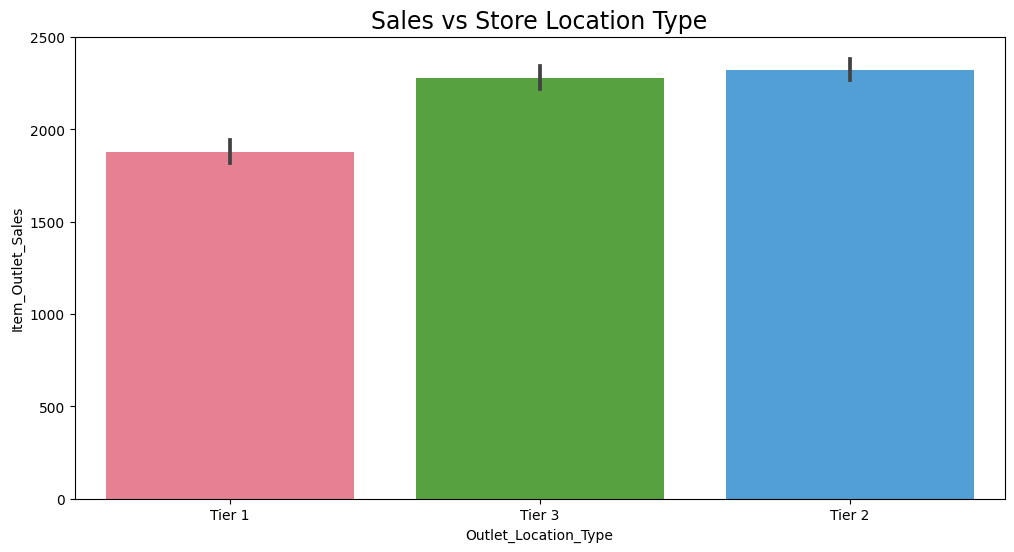

In [165]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store Location Type", fontsize=17)
plt.show()

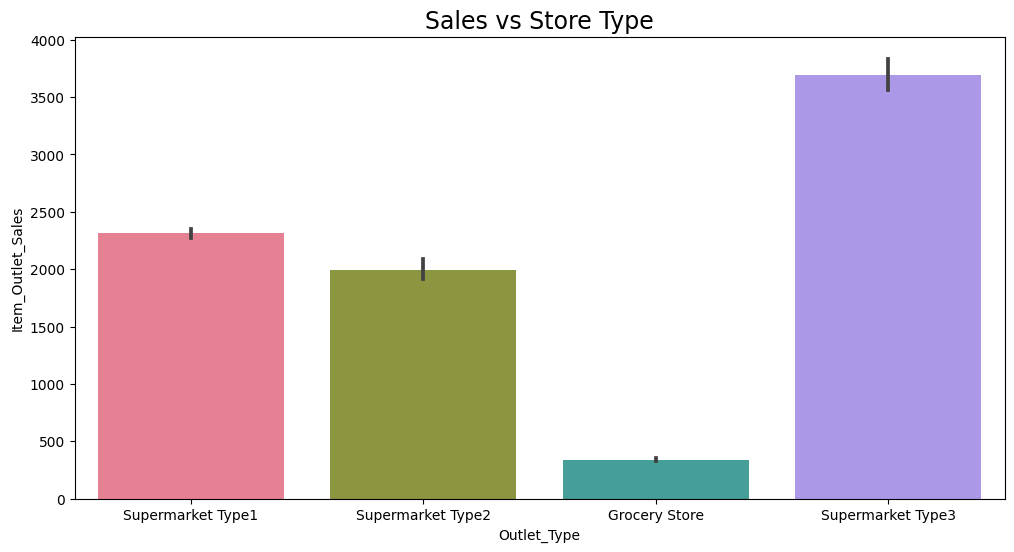

In [166]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store Type", fontsize=17)
plt.show()

* **Fat_Content** : there is no significant difference between sales from low or regular fat products
* **Item_Type** : sales are evenly distributed among all types of products
* **Outlet_Identification** : sales are remarkably larger in *OUT027* and very low in *OUT010* and *OUT019* and that is most probably due to the observation that there are way less products in these two stores
* **Outlet_Size** : medium and high store sizes have higher sales
* **Outlet_Location_Type** : sales in Tier 2 are slightly higher than that of Tier 3
* **Outlet_Type** : grocery stores have very low sales while supermarket type 3 have way higher sales which is unexpected because Supermarket type 1 has a lot more products

## Feature Engineering

### Encoding Categorical Variables

label encoding for Ordinal Data Variables: 
* 'Item_Fat_Content'
* 'Outlet_Size'
* 'Outlet_Location_Type'

In [171]:
le = LabelEncoder()
ordinal = ['Item_Fat_Content' ,'Outlet_Size', 'Outlet_Location_Type']
for feat in ordinal:
  train[feat] = le.fit_transform(train[feat])
  test[feat] = le.fit_transform(test[feat])


train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,24,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,14,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,24,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,25,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,36,1987,0,2,Supermarket Type1,994.7052


One Hot Encoding for Nominal Data Variables: 
* 'Item_Type' 
* 'Outlet_Type'

In [172]:
train = pd.get_dummies(train, columns=['Item_Type',
                                  'Outlet_Type'], drop_first=True)

Dropping unnecessary columns :
* instead of working with the items' IDs I will just use their properties
* dropping Outlet_Estalishment_Year because we can replace it with the age

In [173]:
train.drop(['Item_Identifier', 'Outlet_Identifier', 
         'Outlet_Establishment_Year' ], axis=1, inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,24,1,0,3735.1380,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,14,1,2,443.4228,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,0,0.016760,141.6180,24,1,0,2097.2700,0,0,...,0,1,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,25,1,2,732.3800,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,36,0,2,994.7052,0,0,...,1,0,0,0,0,0,0,1,0,0


## Modelling

In [174]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#### Linear Regression

In [176]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [177]:
y_pred = lin_reg.predict(X_test)

In [178]:
print(f'Training score  : {lin_reg.score(X_train, y_train)}')
print(f'Test score      : {lin_reg.score(X_test, y_test)}')

Training score  : 0.5611043721208793
Test score      : 0.5672847029863066


In [179]:
lin_reg_mae = round(MAE(y_test, y_pred), 4)
lin_reg_mse  = round(MSE(y_test , y_pred), 4)
lin_reg_rmse = round(math.sqrt(lin_reg_mse), 4)
lin_reg_r2   = round(R2(y_test, y_pred), 4)


print(f"Mean Absolute Error: {lin_reg_mae}")
print(f"Mean Squared Error: {lin_reg_mse}")
print(f"RMSE     : {lin_reg_rmse}")
print(f"R2 Score    : {lin_reg_r2}")

Mean Absolute Error: 822.7069
Mean Squared Error: 1226054.357
RMSE     : 1107.2734
R2 Score    : 0.5673


##### Saving results as a csv file

In [180]:
Linear_Regression = pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Linear_Regression.to_csv("Linear Regression.csv")

Standardizing our data

In [181]:
steps = [
    ('scaler', StandardScaler()),
    ('model',  LinearRegression())
       ]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_train, y_train)

print(f'Training score  : {lin_reg_pipeline.score(X_train, y_train)}')
print(f'Test score      : {lin_reg_pipeline.score(X_test, y_test)}')

Training score  : 0.5611043721208793
Test score      : 0.5672847029863066


there is no big difference between accuracies before and after standardizing

#### Regularized Linear Regression

##### Ridge

In [182]:
steps = [
            ('scaler', StandardScaler()),
            ('model' , Ridge(alpha=5, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print(f'Training Score  : {ridge_pipeline.score(X_train, y_train)}')
print(f'Test Score      : {ridge_pipeline.score(X_test, y_test)}')

Training Score  : 0.5611023097235014
Test Score      : 0.5673228185320947


We will add some polynomial features to see if it will increase model performance

In [183]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=5, fit_intercept=True))
        ]

pridge_pipeline = Pipeline(steps)

pridge_pipeline.fit(X_train, y_train)

print(f'Training score  : {pridge_pipeline.score(X_train, y_train)}')
print(f'Test score      : {pridge_pipeline.score(X_test, y_test)}')

Training score  : 0.6149594271776474
Test score      : 0.6001635808869443


polynomial features did affect model performance

In [184]:
y_pred = pridge_pipeline.predict(X_test)
ridge_mae = round(MAE(y_test, y_pred), 4)
ridge_mse  = round(MSE(y_test , y_pred), 4)
ridge_rmse = round(math.sqrt(lin_reg_mse), 4)
ridge_r2   = round(R2(y_test, y_pred), 4)


print(f"Mean Absolute Error: {ridge_mae}")
print(f"Mean Squared Error: {ridge_mse}")
print(f"RMSE     : {ridge_rmse}")
print(f"R2 Score    : {ridge_r2}")

Mean Absolute Error: 752.1209
Mean Squared Error: 1132895.4329
RMSE     : 1107.2734
R2 Score    : 0.6002


In [185]:
Ridge_Regression = pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Ridge_Regression.to_csv("Ridge Regression.csv")

##### Lasso

In [186]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.05, fit_intercept=True, max_iter=10000))
        ]

lasso_pipeline = Pipeline(steps)

lasso_pipeline.fit(X_train, y_train)

print(f'Training score  : {lasso_pipeline.score(X_train, y_train)}')
print(f'Test score      : {lasso_pipeline.score(X_test, y_test)}')

Training score  : 0.614958586206317
Test score      : 0.6001554469320796


c:\Users\mayar\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.246e+08, tolerance: 1.998e+06
  model = cd_fast.enet_coordinate_descent(


In [187]:
y_pred = lasso_pipeline.predict(X_test)
lasso_mae = round(MAE(y_test, y_pred), 4)
lasso_mse  = round(MSE(y_test , y_pred), 4)
lasso_rmse = round(math.sqrt(lin_reg_mse), 4)
lasso_r2   = round(R2(y_test, y_pred), 4)


print(f"Mean Absolute Error: {lasso_mae}")
print(f"Mean Squared Error: {lasso_mse}")
print(f"RMSE     : {lasso_rmse}")
print(f"R2 Score    : {lasso_r2}")

Mean Absolute Error: 752.004
Mean Squared Error: 1132918.4796
RMSE     : 1107.2734
R2 Score    : 0.6002


In [188]:
Lasso_Regression = pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Lasso_Regression.to_csv("Lasso Regression.csv")

##### Random Forest Regressor

In [189]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [190]:
y_pred = rf_regressor.predict(X_test)
print(f'Training score  : {rf_regressor.score(X_train, y_train)}')
print(f'Test score      : {rf_regressor.score(X_test, y_test)}')

Training score  : 0.9361292997528133
Test score      : 0.5571582565356894


we observe that the random forest model overfits the data wso we will do some hyperparameter tuning

In [191]:
rf_regressor_ = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, random_state = 20)
rf_regressor_.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      random_state=20)

In [192]:
print(f'Training score  : {rf_regressor_.score(X_train, y_train)}')
print(f'Test score      : {rf_regressor_.score(X_test, y_test)}')

Training score  : 0.6049571864746977
Test score      : 0.601398096153189


the overfitting is no longer there

In [193]:
y_pred = rf_regressor_.predict(X_test)
rf_mae = round(MAE(y_test, y_pred), 4)
rf_mse  = round(MSE(y_test , y_pred), 4)
rf_rmse = round(math.sqrt(lin_reg_mse), 4)
rf_r2   = round(R2(y_test, y_pred), 4)


print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"RMSE     : {rf_rmse}")
print(f"R2 Score    : {rf_r2}")

Mean Absolute Error: 753.3872
Mean Squared Error: 1129397.5607
RMSE     : 1107.2734
R2 Score    : 0.6014


In [194]:
RandomForest_Regressor = pd.DataFrame({'y_test':y_test,'prediction':y_pred})
RandomForest_Regressor.to_csv("Random Forest Regressor.csv")

#### XGBoost Regressor

In [195]:
! pip install xgboost

In [196]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred= xgb_model.predict(X_test)

In [197]:
print(f'Training score  : {xgb_model.score(X_train, y_train)}')
print(f'Test score      : {xgb_model.score(X_test, y_test)}')

Training score  : 0.8580227695687496
Test score      : 0.5428859578287917


this model also overfits the data

In [198]:
xgb_mae = round(MAE(y_test, y_pred), 4)
xgb_mse  = round(MSE(y_test , y_pred), 4)
xgb_rmse = round(math.sqrt(lin_reg_mse), 4)
xgb_r2   = round(R2(y_test, y_pred), 4)


print(f"Mean Absolute Error: {xgb_mae}")
print(f"Mean Squared Error: {xgb_mse}")
print(f"RMSE     : {xgb_rmse}")
print(f"R2 Score    : {xgb_r2}")

Mean Absolute Error: 805.5139
Mean Squared Error: 1295185.6958
RMSE     : 1107.2734
R2 Score    : 0.5429


In [199]:
MAE= [lin_reg_mae ,lasso_mae ,rf_mae, xgb_mae]
MSE= [lin_reg_mse ,lasso_mse,rf_mse, xgb_mse]
R_2= [lin_reg_r2, lasso_r2 ,rf_r2, xgb_r2]

Models = pd.DataFrame({
    'models': ["Linear Regression", "Lasso Regressor", 
               "Random Forest Regressor", "XGB Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2
1,Lasso Regressor,752.0040,1.132918e+06,0.6002
2,Random Forest Regressor,753.3872,1.129398e+06,0.6014
3,XGB Regressor,805.5139,1.295186e+06,0.5429
0,Linear Regression,822.7069,1.226054e+06,0.5673


* the Item_MRP feature has the most effect on data as it's positively correlated with the target

Saving the Lasso Regression model

In [200]:
with open("BigMart_Sales_Model.pkl", "wb") as file:
    pickle.dump(lasso_pipeline, file)